An example show 2D, and caveat with `plt.pcolor`. The catch is to transpose results from `np.histogram2d` before serving it into `plt.pcolor` to get the correct plot. Otherwise, it would be diagonally symmetric and wrong.

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-12, 12)

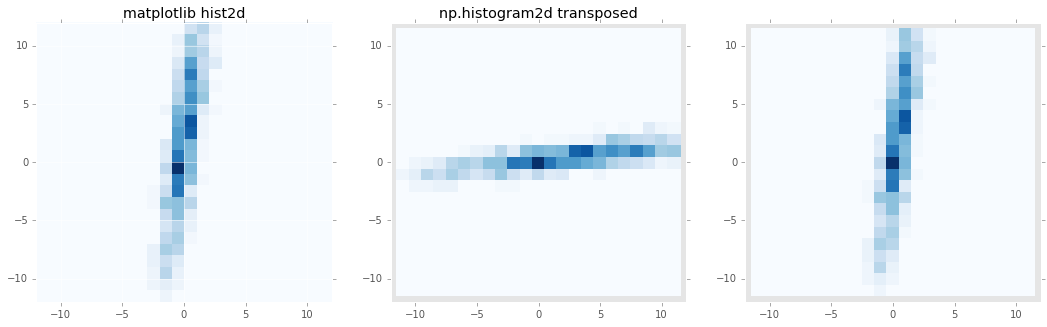

In [3]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


bins = np.arange(-12, 12.1, 1)


num = 1000
xs = np.random.standard_normal(num)
ys = 2.0 + 5.0 * xs + 4.0 * np.random.standard_normal(num)
_ = ax.hist2d(xs, ys, bins=bins, cmap=plt.cm.Blues)
ax.set_title('matplotlib hist2d')


H, xedges, yedges = np.histogram2d(xs, ys, bins=bins, normed=True)
# This is a key transpose for whatever reason!!!
# Otherwise, the results is diagnoally symetric to ax.hist2d
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
ax2.pcolor(xcenters, ycenters, H, cmap=plt.cm.Blues)
ax2.set_title('np.histogram2d')
ax2.set_xlim(-12, 12)
ax2.set_ylim(-12, 12)


ax3.pcolor(xcenters, ycenters, H.T, cmap=plt.cm.Blues)
ax2.set_title('np.histogram2d transposed')
ax3.set_xlim(-12, 12)
ax3.set_ylim(-12, 12)